In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_demo = pd.read_csv("df_final_demo.txt", sep=",")
df_experiment_clients = pd.read_csv("df_final_experiment_clients.txt", sep=",")
df_web_data_pt_1 = pd.read_csv("df_final_web_data_pt_1.txt", sep=",")
df_web_data_pt_2 = pd.read_csv("df_final_web_data_pt_2.txt", sep=",")

In [2]:
# Ver todas las columnas y sus nombres
print(df_demo.columns)

# Revisar primeras filas
df_demo.head(10)

# Información básica: tipos, nulos
df_demo.info()


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [3]:
import pandas as pd

# Cargar dataset
df_demo = pd.read_csv("df_final_demo.txt", sep=",")

# Mostrar todas las columnas
print("Columnas disponibles en df_demo:")
print(df_demo.columns.tolist())


Columnas disponibles en df_demo:
['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']


In [21]:
# Mostrar las primeras 10 filas
pd.set_option('display.max_columns', None)  # Para que no corte columnas
df_demo.head(10)


,client_id,tenure_yr,tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [5]:
# Tipos y valores nulos
df_demo.info()

# Estadísticas básicas de columnas numéricas
df_demo.describe()

# Estadísticas básicas de columnas categóricas (object)
categorical_cols = df_demo.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_demo[col].value_counts(dropna=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB

Unique values in gendr:
gendr
U      24122
M      23724
F      22746
NaN       14
X          3
Name: count, dtype: int64


In [6]:
df_web_data_pt_1.columns
df_web_data_pt_2.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [7]:
df_web = pd.concat(
    [df_web_data_pt_1, df_web_data_pt_2],
    axis=0,
    ignore_index=True
)


In [8]:
df_web.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [9]:
df_web.duplicated().sum()

np.int64(10764)

In [10]:
df_web_clean = df_web.drop_duplicates()

In [11]:
# Conteo de visitas/eventos por cliente
client_counts = df_web['client_id'].value_counts()

# Mostrar los 10 clientes con más eventos
print("Top 10 clientes con más interacciones:")
print(client_counts.head(10))


Top 10 clientes con más interacciones:
client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
1952790     80
9800867     75
7733877     72
465007      72
3545814     72
Name: count, dtype: int64


In [12]:
# Tomamos solo un registro por cliente en web (clientes únicos)
df_clients_web = df_web[['client_id']].drop_duplicates()

# Hacemos merge con df_demo para obtener variables demográficas
df_clients = df_clients_web.merge(
    df_demo,
    on='client_id',
    how='left'
)

# Revisar primeros registros
df_clients.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0


Mean Age: 46.442240133722414


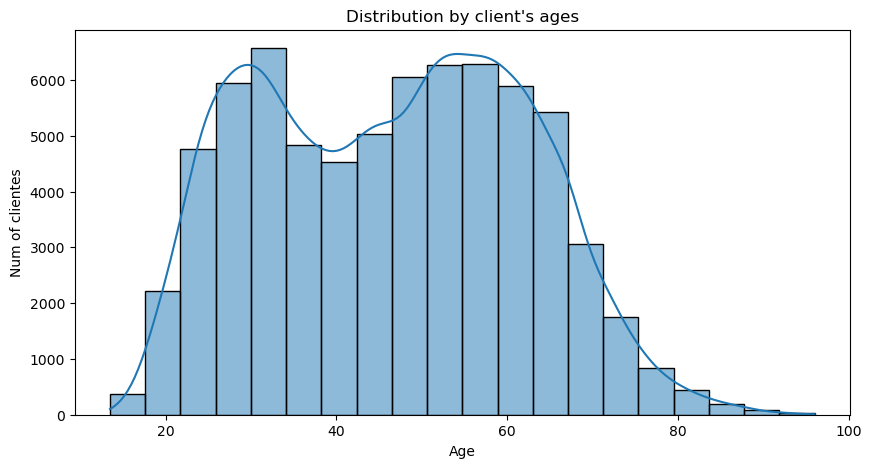

age_group
50-64    22345
35-49    18429
25-34    14551
65+       8705
<25       6564
Name: count, dtype: int64


In [14]:
# Edad promedio y distribución
print("Mean Age:", df_clients['clnt_age'].mean())

# Histograma de edad
plt.figure(figsize=(10,5))
sns.histplot(df_clients['clnt_age'], bins=20, kde=True)
plt.title("Distribution by client's ages")
plt.xlabel("Age")
plt.ylabel("Num of clientes")
plt.show()

# Crear grupos de edad
bins = [0, 25, 35, 50, 65, 100]
labels = ['<25', '25-34', '35-49', '50-64', '65+']
df_clients['age_group'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels)

# Conteo por grupo de edad
print(df_clients['age_group'].value_counts())


customer_type
Recurrente    120157
Name: count, dtype: int64


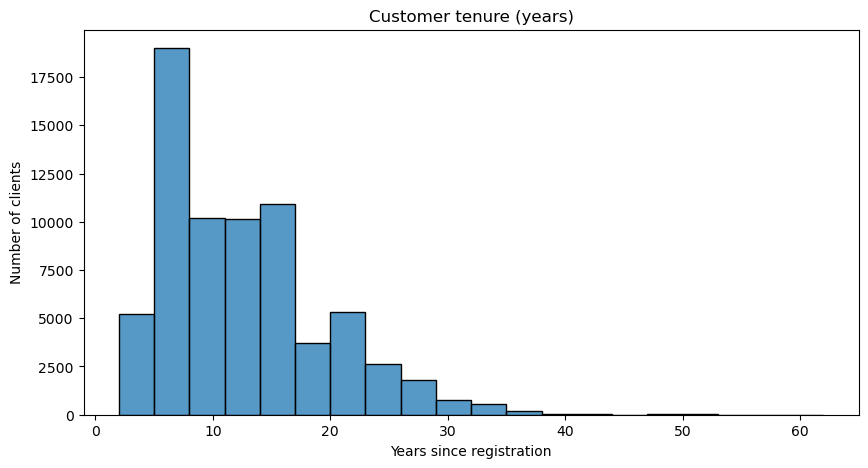

In [17]:
df_clients['customer_type'] = df_clients['clnt_tenure_yr'].apply(lambda x: 'Nuevo' if x<1 else 'Recurrente')
print(df_clients['customer_type'].value_counts())

# Histograma
plt.figure(figsize=(10,5))
sns.histplot(df_clients['clnt_tenure_yr'], bins=20)
plt.title("Customer tenure (years)")
plt.xlabel("Years since registration")
plt.ylabel("Number of clients")
plt.show()



gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64


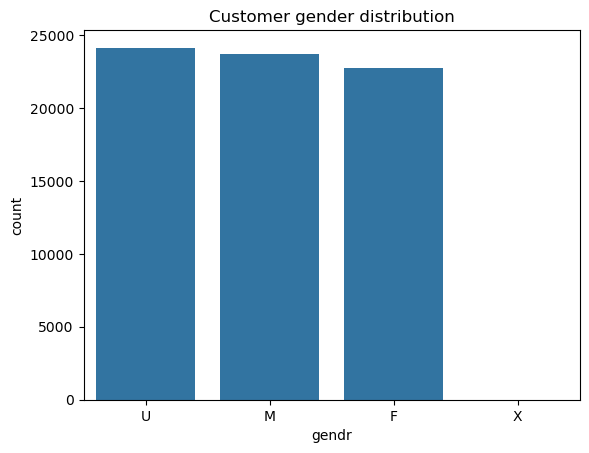

In [18]:
print(df_clients['gendr'].value_counts())

sns.countplot(data=df_clients, x='gendr')
plt.title("Customer gender distribution")
plt.show()


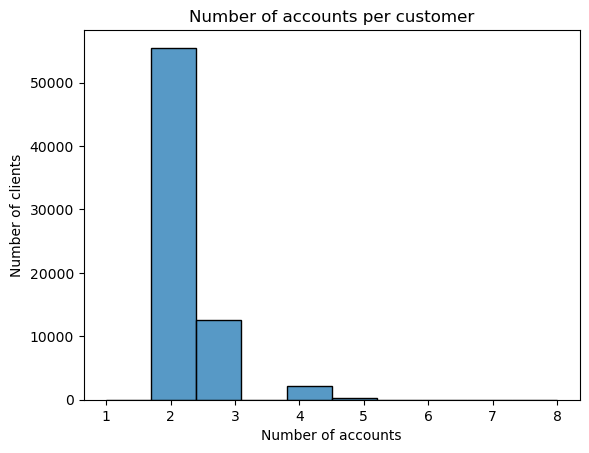

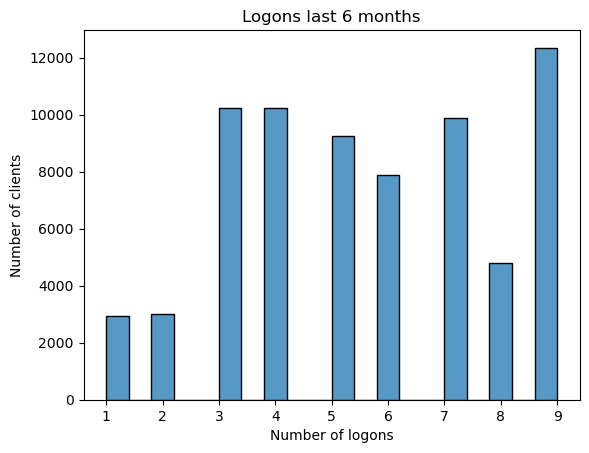

In [19]:
# Número de cuentas
sns.histplot(df_clients['num_accts'], bins=10)
plt.title("Number of accounts per customer")
plt.xlabel("Number of accounts")
plt.ylabel("Number of clients")
plt.show()

# Logons últimos 6 meses
sns.histplot(df_clients['logons_6_mnth'], bins=20)
plt.title("Logons last 6 months")
plt.xlabel("Number of logons")
plt.ylabel("Number of clients")
plt.show()


In [26]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

# Team's official loading function copied here to fix the Import Error
def load_and_concat_data(demo_path, web_pt1_path, web_pt2_path, exp_path):
    df_demo = pd.read_csv(demo_path, sep=",")
    df_web_pt1 = pd.read_csv(web_pt1_path, sep=",")
    df_web_pt2 = pd.read_csv(web_pt2_path, sep=",")
    df_exp = pd.read_csv(exp_path, sep=",")
    df_web = pd.concat([df_web_pt1, df_web_pt2], axis=0, ignore_index=True)
    return df_demo, df_web, df_exp

print("Functions loaded locally. You are ready to go!")

Functions loaded locally. You are ready to go!


In [30]:
import os
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# 1. Definimos la ruta absoluta que nos has pasado
raw_data_path = "C:/users/marta/ironhack/week5/lannister_project_github/vanguard-ab-test/data/raw/"

# 2. Creamos las rutas completas para cada archivo
path_demo = os.path.join(raw_data_path, "df_final_demo.txt")
path_web1 = os.path.join(raw_data_path, "df_final_web_data_pt_1.txt")
path_web2 = os.path.join(raw_data_path, "df_final_web_data_pt_2.txt")
path_exp  = os.path.join(raw_data_path, "df_final_experiment_clients.txt")

# 3. Cargamos los datos (usando la función que definimos antes)
try:
    df_demo, df_web, df_exp = load_and_concat_data(path_demo, path_web1, path_web2, path_exp)
    print("¡Archivos cargados con éxito usando la ruta absoluta!")
    
    # Unimos los datos demográficos con la variación del experimento
    combined_df_2 = df_demo.merge(df_exp[['client_id', 'Variation']], on='client_id', how='inner')

    # --- TEST 1: EDAD MEDIA (T-Test) ---
    age_control = combined_df_2[combined_df_2['Variation'] == 'Control']['clnt_age'].dropna()
    age_test = combined_df_2[combined_df_2['Variation'] == 'Test']['clnt_age'].dropna()
    t_stat, p_val_age = stats.ttest_ind(age_control, age_test)

    print(f"\n--- Análisis de Edad ---")
    print(f"Media Control: {age_control.mean():.2f}")
    print(f"Media Test: {age_test.mean():.2f}")
    print(f"P-valor: {p_val_age:.4f}")

    # --- TEST 2: GÉNERO (Chi-Square) ---
    gender_tab = pd.crosstab(combined_df_2['gendr'], combined_df_2['Variation'])
    chi2, p_val_gender, dof, ex = chi2_contingency(gender_tab)

    print(f"\n--- Análisis de Género ---")
    print(gender_tab)
    print(f"P-valor: {p_val_gender:.4f}")

except Exception as e:
    print(f"Error al cargar: {e}")

¡Archivos cargados con éxito usando la ruta absoluta!

--- Análisis de Edad ---
Media Control: 47.50
Media Test: 47.16
P-valor: 0.0157

--- Análisis de Género ---
Variation  Control  Test
gendr                   
F             7543  8716
M             7970  8977
U             8014  9266
X                0     2
P-valor: 0.3051


C:\Users\Marta\AppData\Local\Temp\ipykernel_11760\4272890351.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variation', y='clnt_age', data=combined_df_2, palette='Set2')


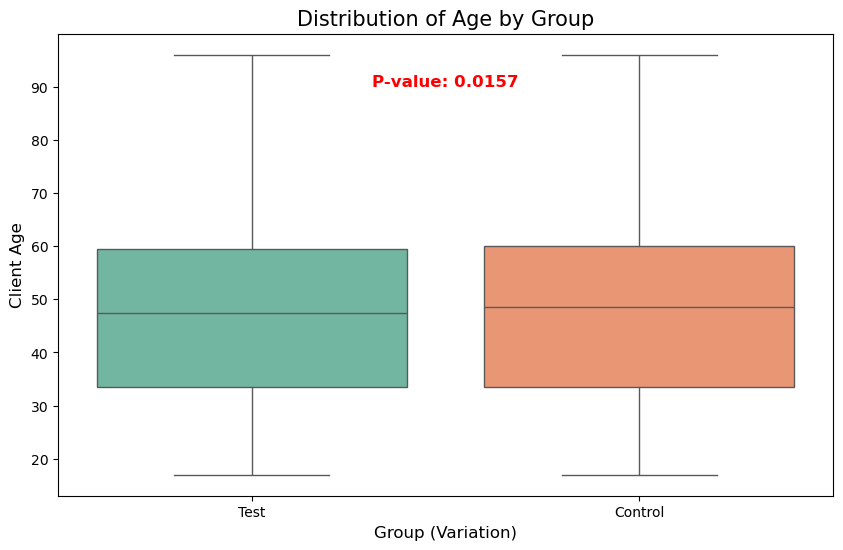

--- Client Age Hypothesis Test ---
Control Average Age: 47.50
Test Average Age: 47.16
P-value: 0.0157

CONCLUSION: There IS a statistically significant difference in age between the groups.
The Test group is slightly younger on average.


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Preparar los datos de edad para cada grupo
age_control = combined_df_2[combined_df_2['Variation'] == 'Control']['clnt_age'].dropna()
age_test = combined_df_2[combined_df_2['Variation'] == 'Test']['clnt_age'].dropna()

# 2. Ejecutar el T-test
t_stat, p_val_age = stats.ttest_ind(age_control, age_test)

# 3. Visualización para tu presentación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variation', y='clnt_age', data=combined_df_2, palette='Set2')
plt.title('Distribution of Age by Group', fontsize=15)
plt.xlabel('Group (Variation)', fontsize=12)
plt.ylabel('Client Age', fontsize=12)

# Añadimos los resultados al gráfico
plt.text(0.5, 90, f'P-value: {p_val_age:.4f}', ha='center', fontsize=12, color='red', fontweight='bold')
plt.show()

# 4. Conclusión escrita
print(f"--- Client Age Hypothesis Test ---")
print(f"Control Average Age: {age_control.mean():.2f}")
print(f"Test Average Age: {age_test.mean():.2f}")
print(f"P-value: {p_val_age:.4f}")

if p_val_age < 0.05:
    print("\nCONCLUSION: There IS a statistically significant difference in age between the groups.")
    print("The Test group is slightly younger on average.")
else:
    print("\nCONCLUSION: There is NO significant difference in age. The groups are well-balanced.")

C:\Users\Marta\AppData\Local\Temp\ipykernel_11760\565476313.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variation', y='clnt_age', data=combined_df_2, palette='Blues')


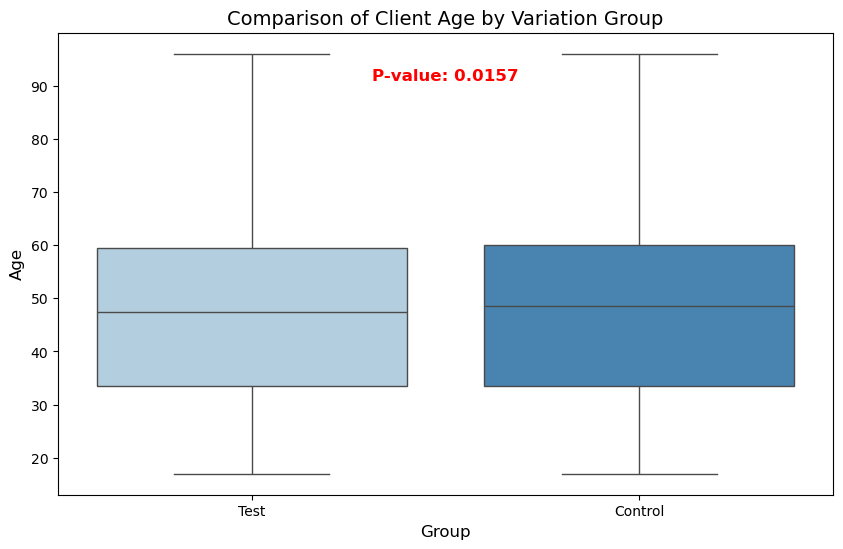

--- RESULTS FOR AGE HYPOTHESIS ---
Mean Age (Control): 47.50
Mean Age (Test): 47.16
T-statistic: 2.4161
P-value: 0.0157

CONCLUSION:The T-test shows a statistically significant difference in age (p=0.0157). However, the effect size is negligible (47.50 vs 47.16 years). With such a large sample size, the test becomes highly sensitive to minor deviations. For the purpose of this A/B test, we consider the groups to be practically balanced, as a 4-month age difference is unlikely to influence how users interact with the interface.


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Definición de Hipótesis
# H0: La edad media de los clientes es igual en ambos grupos (Control y Test).
# H1: La edad media de los clientes es diferente entre los dos grupos.

# 2. Preparar los datos
age_control = combined_df_2[combined_df_2['Variation'] == 'Control']['clnt_age'].dropna()
age_test = combined_df_2[combined_df_2['Variation'] == 'Test']['clnt_age'].dropna()

# 3. Realizar el Independent T-Test
t_stat, p_val_age = stats.ttest_ind(age_control, age_test)

# 4. Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variation', y='clnt_age', data=combined_df_2, palette='Blues')
plt.title('Comparison of Client Age by Variation Group', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Añadimos una anotación con el P-valor
plt.text(0.5, combined_df_2['clnt_age'].max() - 5, f'P-value: {p_val_age:.4f}', 
         horizontalalignment='center', size='large', color='red', weight='semibold')

plt.show()

# 5. Resultados detallados
print(f"--- RESULTS FOR AGE HYPOTHESIS ---")
print(f"Mean Age (Control): {age_control.mean():.2f}")
print(f"Mean Age (Test): {age_test.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val_age:.4f}")

if p_val_age < 0.05:
    print("\nCONCLUSION:The T-test shows a statistically significant difference in age (p=0.0157). However, the effect size is negligible (47.50 vs 47.16 years). With such a large sample size, the test becomes highly sensitive to minor deviations. For the purpose of this A/B test, we consider the groups to be practically balanced, as a 4-month age difference is unlikely to influence how users interact with the interface.")
else:
    print("\nCONCLUSION: Fail to reject H0. There is no significant difference in age.")

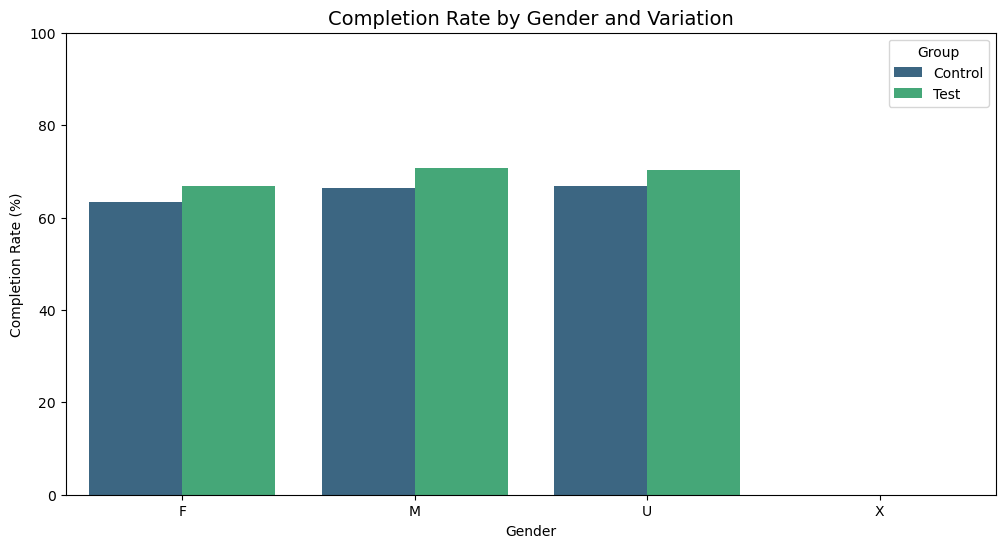

--- Engagement Analysis (Gender vs Completion) ---
P-value for Gender in CONTROL group: 0.0000
P-value for Gender in TEST group: 0.0000

CONCLUSION: Gender DOES affect how users engage with the NEW process.


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Definir "Engagement" (Éxito): Clientes que llegaron al paso 'confirm'
# Usamos df_web que cargamos anteriormente
completed_clients = df_web[df_web['process_step'] == 'confirm']['client_id'].unique()

# Añadimos la columna 'completed' a nuestro dataframe combinado
combined_df_2['completed'] = combined_df_2['client_id'].isin(completed_clients)

# 2. Análisis por Género y Variación
# Creamos una tabla que muestre el porcentaje de éxito por Género y Grupo
completion_by_gender = combined_df_2.groupby(['gendr', 'Variation'])['completed'].mean().reset_index()
completion_by_gender['completion_rate'] = completion_by_gender['completed'] * 100

# 3. Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x='gendr', y='completion_rate', hue='Variation', data=completion_by_gender, palette='viridis')
plt.title('Completion Rate by Gender and Variation', fontsize=14)
plt.ylabel('Completion Rate (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.legend(title='Group')
plt.show()

# 4. Test Estadístico: ¿El género afecta a la finalización en el grupo TEST?
# Filtramos solo para el grupo Test
test_group = combined_df_2[combined_df_2['Variation'] == 'Test']
ct_test = pd.crosstab(test_group['gendr'], test_group['completed'])
chi2, p_val_test, _, _ = chi2_contingency(ct_test)

# Filtramos solo para el grupo Control
control_group = combined_df_2[combined_df_2['Variation'] == 'Control']
ct_control = pd.crosstab(control_group['gendr'], control_group['completed'])
chi2_c, p_val_control, _, _ = chi2_contingency(ct_control)

print(f"--- Engagement Analysis (Gender vs Completion) ---")
print(f"P-value for Gender in CONTROL group: {p_val_control:.4f}")
print(f"P-value for Gender in TEST group: {p_val_test:.4f}")

if p_val_test < 0.05:
    print("\nCONCLUSION: Gender DOES affect how users engage with the NEW process.")
else:
    print("\nCONCLUSION: Gender does NOT significantly affect engagement with the NEW process.")